# 14장 모델의 성능 향상시키기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch14-colab.ipynb)

## 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 3s 37ms/step - loss: 0.2756 - accuracy: 0.9079 - val_loss: 0.2583 - val_accuracy: 0.9085
Epoch 2/50
8/8 [==============================] - 0

In [4]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 10ms/step - loss: 0.1375 - accuracy: 0.9423
Test accuracy: 0.942307710647583


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint # 학습 중간에 모델을 저장하는 콜백 
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [6]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, 
                  callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all\01-0.7954.hdf5

Epoch 2: saving model to ./data/model/all\02-0.9023.hdf5

Epoch 3: saving model to ./data/model/all\03-0.9162.hdf5

Epoch 4: saving model to ./data/model/all\04-0.9338.hdf5

Epoch 5: saving model to ./data/model/all\05-0.9400.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9408.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9338.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9408.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9369.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9415.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9408.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9423.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9408.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9408.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9415.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9438.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9431.hdf5

Epoch

In [7]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 10ms/step - loss: 0.1186 - accuracy: 0.9569
Test accuracy: 0.9569230675697327


## 3. 그래프로 과적합 확인하기

In [8]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [9]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.115991,0.956120,0.118965,0.957692
1,0.115635,0.956633,0.113583,0.960000
2,0.112611,0.957660,0.112647,0.960000
3,0.110529,0.959456,0.116088,0.966923
4,0.108743,0.957916,0.113860,0.966154
...,...,...,...,...
1995,0.025604,0.992302,0.071300,0.986923
1996,0.022993,0.993585,0.068320,0.987692
1997,0.020562,0.995124,0.077285,0.984615
1998,0.022608,0.995124,0.077934,0.985385


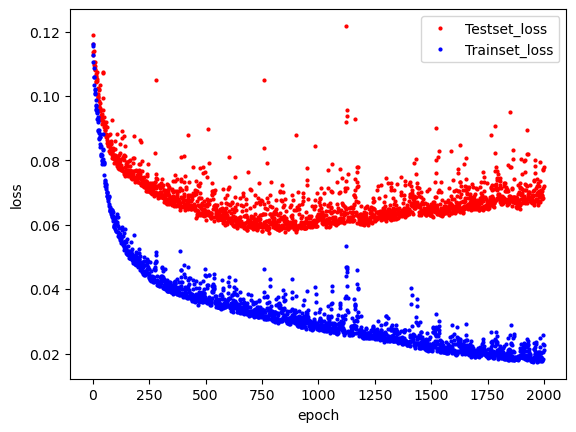

In [10]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [12]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, 
                  callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 55ms/step - loss: 5.2343 - accuracy: 0.2525 - val_loss: 3.3541 - val_accuracy: 0.2415
Epoch 2/2000
8/8 [==============================] - 0s 31ms/step - loss: 2.6663 - accuracy: 0.2525 - val_loss: 2.1294 - val_accuracy: 0.2415
Epoch 3/2000
8/8 [==============================] - 0s 25ms/step - loss: 1.6415 - accuracy: 0.2525 - val_loss: 1.1387 - val_accuracy: 0.2462
Epoch 4/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.9006 - accuracy: 0.3254 - val_loss: 0.7399 - val_accuracy: 0.5254
Epoch 5/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.6771 - accuracy: 0.6551 - val_loss: 0.6467 - val_accuracy: 0.7615
Epoch 6/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.6270 - accuracy: 0.7980 - val_loss: 0.6263 - val_accuracy: 0.8492
Epoch 7/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.6109 - accuracy: 0.8635 - val_loss: 0.6164 - val_accuracy: 0.8885
Epoch 8/2000


Epoch 59/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.4513 - accuracy: 0.9448 - val_loss: 0.4573 - val_accuracy: 0.9462
Epoch 60/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.4494 - accuracy: 0.9466 - val_loss: 0.4549 - val_accuracy: 0.9454
Epoch 61/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.4476 - accuracy: 0.9446 - val_loss: 0.4535 - val_accuracy: 0.9477
Epoch 62/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.4453 - accuracy: 0.9464 - val_loss: 0.4514 - val_accuracy: 0.9469
Epoch 63/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.4430 - accuracy: 0.9448 - val_loss: 0.4488 - val_accuracy: 0.9454
Epoch 64/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.4409 - accuracy: 0.9456 - val_loss: 0.4470 - val_accuracy: 0.9469
Epoch 65/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.4390 - accuracy: 0.9443 - val_loss: 0.4452 - val_accuracy: 0.9469
Epoch 

8/8 [==============================] - 0s 13ms/step - loss: 0.3327 - accuracy: 0.9695 - val_loss: 0.3436 - val_accuracy: 0.9654
Epoch 117/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3320 - accuracy: 0.9697 - val_loss: 0.3391 - val_accuracy: 0.9700
Epoch 118/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3321 - accuracy: 0.9656 - val_loss: 0.3388 - val_accuracy: 0.9662
Epoch 119/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3300 - accuracy: 0.9664 - val_loss: 0.3348 - val_accuracy: 0.9685
Epoch 120/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3253 - accuracy: 0.9713 - val_loss: 0.3343 - val_accuracy: 0.9677
Epoch 121/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3233 - accuracy: 0.9702 - val_loss: 0.3326 - val_accuracy: 0.9677
Epoch 122/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3221 - accuracy: 0.9710 - val_loss: 0.3341 - val_accuracy: 0.9669
Epoch 123/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.2435 - accuracy: 0.9808 - val_loss: 0.2505 - val_accuracy: 0.9746
Epoch 174/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.2447 - accuracy: 0.9802 - val_loss: 0.2576 - val_accuracy: 0.9731
Epoch 175/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2431 - accuracy: 0.9802 - val_loss: 0.2493 - val_accuracy: 0.9754
Epoch 176/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2399 - accuracy: 0.9810 - val_loss: 0.2473 - val_accuracy: 0.9746
Epoch 177/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2397 - accuracy: 0.9820 - val_loss: 0.2460 - val_accuracy: 0.9746
Epoch 178/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2390 - accuracy: 0.9810 - val_loss: 0.2495 - val_accuracy: 0.9708
Epoch 179/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2404 - accuracy: 0.9784 - val_loss: 0.2434 - val_accuracy: 0.9762
Epoch 180/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.1891 - accuracy: 0.9851 - val_loss: 0.1958 - val_accuracy: 0.9823
Epoch 231/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1897 - accuracy: 0.9836 - val_loss: 0.1946 - val_accuracy: 0.9823
Epoch 232/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1878 - accuracy: 0.9846 - val_loss: 0.1937 - val_accuracy: 0.9800
Epoch 233/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1877 - accuracy: 0.9846 - val_loss: 0.1926 - val_accuracy: 0.9800
Epoch 234/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1880 - accuracy: 0.9841 - val_loss: 0.1931 - val_accuracy: 0.9777
Epoch 235/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1871 - accuracy: 0.9841 - val_loss: 0.1909 - val_accuracy: 0.9808
Epoch 236/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1871 - accuracy: 0.9823 - val_loss: 0.1914 - val_accuracy: 0.9777
Epoch 237/2000

8/8 [==============================] - 0s 16ms/step - loss: 0.1519 - accuracy: 0.9843 - val_loss: 0.1567 - val_accuracy: 0.9815
Epoch 288/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1521 - accuracy: 0.9851 - val_loss: 0.1567 - val_accuracy: 0.9823
Epoch 289/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1508 - accuracy: 0.9846 - val_loss: 0.1566 - val_accuracy: 0.9823
Epoch 290/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1511 - accuracy: 0.9838 - val_loss: 0.1568 - val_accuracy: 0.9808
Epoch 291/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1508 - accuracy: 0.9856 - val_loss: 0.1548 - val_accuracy: 0.9808
Epoch 292/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1492 - accuracy: 0.9859 - val_loss: 0.1558 - val_accuracy: 0.9823
Epoch 293/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1489 - accuracy: 0.9861 - val_loss: 0.1568 - val_accuracy: 0.9823
Epoch 294/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.1258 - accuracy: 0.9856 - val_loss: 0.1373 - val_accuracy: 0.9823
Epoch 345/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1255 - accuracy: 0.9854 - val_loss: 0.1322 - val_accuracy: 0.9823
Epoch 346/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1249 - accuracy: 0.9856 - val_loss: 0.1296 - val_accuracy: 0.9823
Epoch 347/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1248 - accuracy: 0.9859 - val_loss: 0.1290 - val_accuracy: 0.9815
Epoch 348/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1246 - accuracy: 0.9851 - val_loss: 0.1289 - val_accuracy: 0.9823
Epoch 349/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1225 - accuracy: 0.9861 - val_loss: 0.1302 - val_accuracy: 0.9823
Epoch 350/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1220 - accuracy: 0.9867 - val_loss: 0.1279 - val_accuracy: 0.9823
Epoch 351/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.1059 - accuracy: 0.9861 - val_loss: 0.1118 - val_accuracy: 0.9815
Epoch 402/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1058 - accuracy: 0.9859 - val_loss: 0.1109 - val_accuracy: 0.9808
Epoch 403/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1041 - accuracy: 0.9859 - val_loss: 0.1103 - val_accuracy: 0.9815
Epoch 404/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1036 - accuracy: 0.9874 - val_loss: 0.1104 - val_accuracy: 0.9823
Epoch 405/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1036 - accuracy: 0.9864 - val_loss: 0.1090 - val_accuracy: 0.9831
Epoch 406/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1047 - accuracy: 0.9861 - val_loss: 0.1089 - val_accuracy: 0.9831
Epoch 407/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1026 - accuracy: 0.9872 - val_loss: 0.1107 - val_accuracy: 0.9831
Epoch 408/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.0916 - accuracy: 0.9854 - val_loss: 0.0954 - val_accuracy: 0.9854
Epoch 459/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0935 - accuracy: 0.9856 - val_loss: 0.1028 - val_accuracy: 0.9808
Epoch 460/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0933 - accuracy: 0.9851 - val_loss: 0.0966 - val_accuracy: 0.9838
Epoch 461/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0970 - accuracy: 0.9841 - val_loss: 0.0962 - val_accuracy: 0.9815
Epoch 462/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0910 - accuracy: 0.9869 - val_loss: 0.1010 - val_accuracy: 0.9815
Epoch 463/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0902 - accuracy: 0.9877 - val_loss: 0.0966 - val_accuracy: 0.9815
Epoch 464/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0901 - accuracy: 0.9856 - val_loss: 0.1018 - val_accuracy: 0.9815
Epoch 465/2000

8/8 [==============================] - 0s 11ms/step - loss: 0.0774 - accuracy: 0.9869 - val_loss: 0.0858 - val_accuracy: 0.9823
Epoch 516/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0789 - accuracy: 0.9867 - val_loss: 0.0871 - val_accuracy: 0.9800
Epoch 517/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0813 - accuracy: 0.9846 - val_loss: 0.0973 - val_accuracy: 0.9800
Epoch 518/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0824 - accuracy: 0.9864 - val_loss: 0.0956 - val_accuracy: 0.9808
Epoch 519/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0819 - accuracy: 0.9846 - val_loss: 0.0884 - val_accuracy: 0.9815
Epoch 520/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0842 - accuracy: 0.9854 - val_loss: 0.0829 - val_accuracy: 0.9846
Epoch 521/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0792 - accuracy: 0.9859 - val_loss: 0.0845 - val_accuracy: 0.9854
Epoch 522/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0675 - accuracy: 0.9882 - val_loss: 0.0741 - val_accuracy: 0.9854
Epoch 573/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0668 - accuracy: 0.9869 - val_loss: 0.0731 - val_accuracy: 0.9846
Epoch 574/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0666 - accuracy: 0.9885 - val_loss: 0.0759 - val_accuracy: 0.9823
Epoch 575/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0676 - accuracy: 0.9879 - val_loss: 0.0829 - val_accuracy: 0.9831
Epoch 576/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0699 - accuracy: 0.9859 - val_loss: 0.0774 - val_accuracy: 0.9815
Epoch 577/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0664 - accuracy: 0.9867 - val_loss: 0.0719 - val_accuracy: 0.9854
Epoch 578/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0669 - accuracy: 0.9872 - val_loss: 0.0726 - val_accuracy: 0.9854
Epoch 579/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.0677 - accuracy: 0.9864 - val_loss: 0.0686 - val_accuracy: 0.9815
Epoch 630/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0626 - accuracy: 0.9872 - val_loss: 0.0700 - val_accuracy: 0.9815
Epoch 631/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0604 - accuracy: 0.9877 - val_loss: 0.0735 - val_accuracy: 0.9831
Epoch 632/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0631 - accuracy: 0.9867 - val_loss: 0.0695 - val_accuracy: 0.9823
Epoch 633/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0590 - accuracy: 0.9885 - val_loss: 0.0651 - val_accuracy: 0.9854
Epoch 634/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0594 - accuracy: 0.9874 - val_loss: 0.0640 - val_accuracy: 0.9854
Epoch 635/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0653 - accuracy: 0.9879 - val_loss: 0.0661 - val_accuracy: 0.9838
Epoch 636/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.0553 - accuracy: 0.9877 - val_loss: 0.0584 - val_accuracy: 0.9854
Epoch 687/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0534 - accuracy: 0.9882 - val_loss: 0.0588 - val_accuracy: 0.9846
Epoch 688/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0537 - accuracy: 0.9887 - val_loss: 0.0620 - val_accuracy: 0.9831
Epoch 689/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0537 - accuracy: 0.9887 - val_loss: 0.0616 - val_accuracy: 0.9838
Epoch 690/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0531 - accuracy: 0.9895 - val_loss: 0.0728 - val_accuracy: 0.9831
Epoch 691/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0588 - accuracy: 0.9874 - val_loss: 0.0617 - val_accuracy: 0.9838
Epoch 692/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0592 - accuracy: 0.9879 - val_loss: 0.0593 - val_accuracy: 0.9846
Epoch 693/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0508 - accuracy: 0.9872 - val_loss: 0.0564 - val_accuracy: 0.9846
Epoch 744/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0490 - accuracy: 0.9895 - val_loss: 0.0546 - val_accuracy: 0.9854
Epoch 745/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0491 - accuracy: 0.9895 - val_loss: 0.0556 - val_accuracy: 0.9862
Epoch 746/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0532 - accuracy: 0.9879 - val_loss: 0.0544 - val_accuracy: 0.9877
Epoch 747/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0521 - accuracy: 0.9885 - val_loss: 0.0544 - val_accuracy: 0.9869
Epoch 748/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0496 - accuracy: 0.9902 - val_loss: 0.0619 - val_accuracy: 0.9831
Epoch 749/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0504 - accuracy: 0.9890 - val_loss: 0.0681 - val_accuracy: 0.9823


In [13]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 8ms/step - loss: 0.1070 - accuracy: 0.9815
Test accuracy: 0.9815384745597839
